### **Task 1**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("/content/MLR_data.csv")

In [70]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [71]:
df.shape

(24, 5)

In [72]:
df.describe()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [73]:
# all columns except last
iv_cols = df.columns[:-1]
# last column
dv_cols = df.columns[-1]

In [74]:
print(iv_cols)
print(dv_cols)

Index(['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate'], dtype='object')
Stock_Index_Price


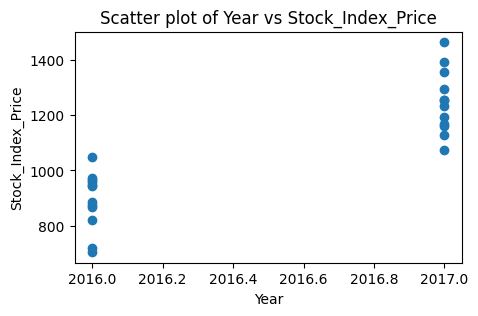

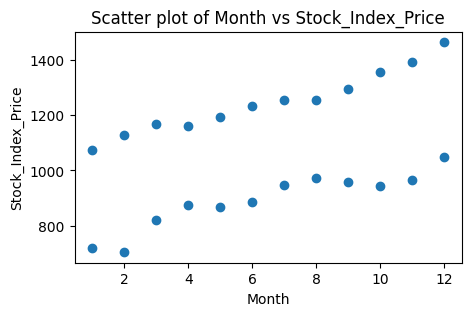

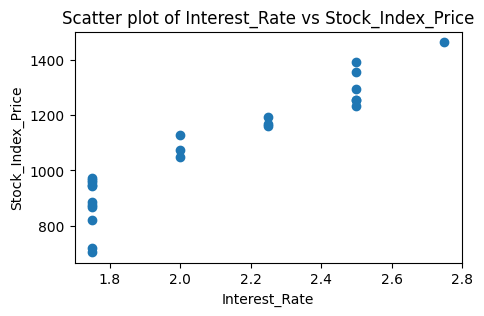

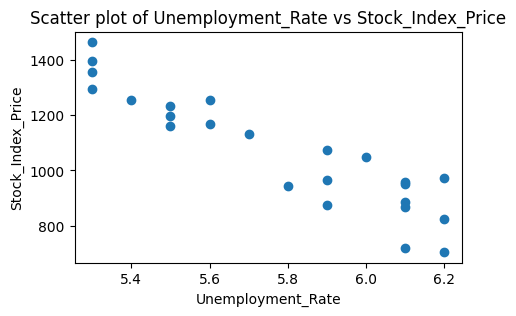

In [75]:
# to plot scatter plots for each iv with dv
for iv in iv_cols:
    plt.figure(figsize=(5, 3))
    plt.scatter(df[iv], df[dv_cols])
    plt.xlabel(iv)
    plt.ylabel(dv_cols)
    plt.title(f'Scatter plot of {iv} vs {dv_cols}')
    plt.show()

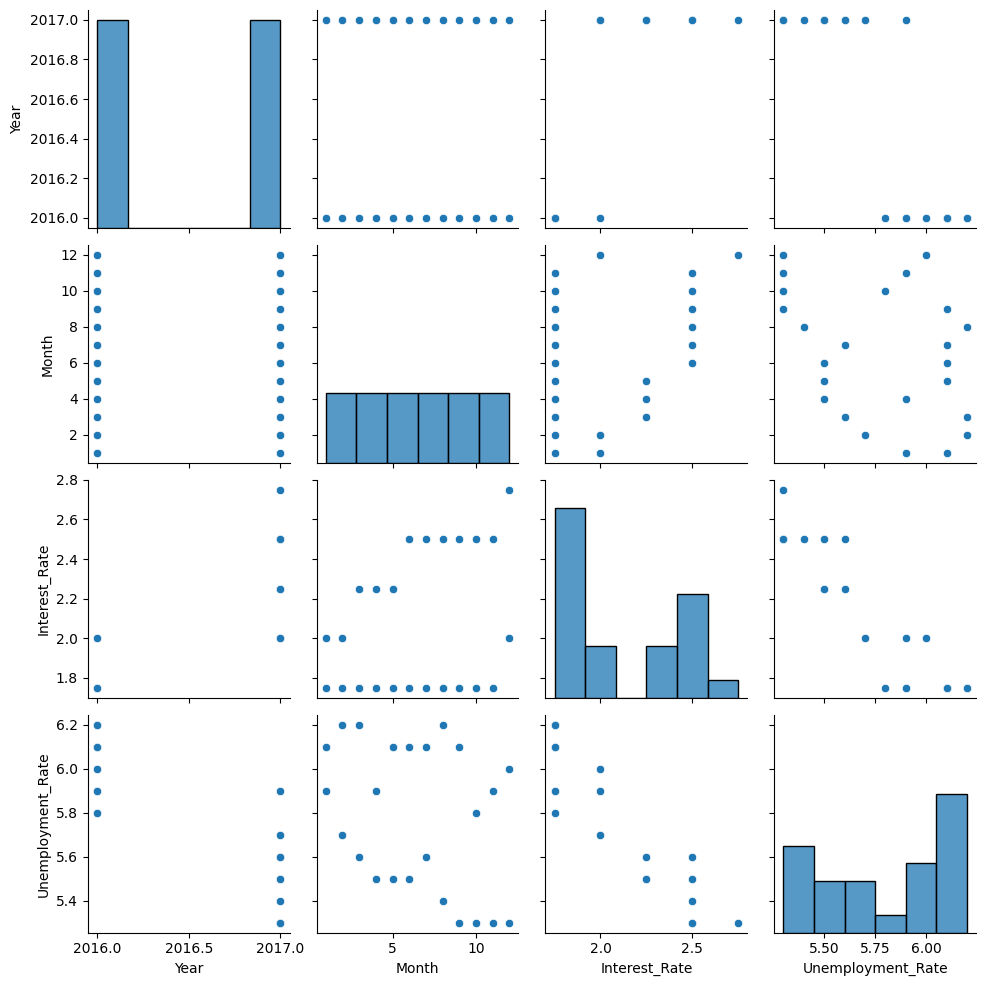

In [76]:
# pairwise scatter plots for ivs
sns.pairplot(df[iv_cols])
plt.show()
# note - pairplot method from seaborn provides grid of scatter plots for each pair of ivs

### **Task 2**

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()

In [79]:
# Interest rate vs stock index price

x = df[["Interest_Rate"]]
y = df["Stock_Index_Price"]

model.fit(x, y)

LinearRegression()

In [80]:
# Unemployment vs stock index price

z = df[["Unemployment_Rate"]]

model.fit(z, y)

LinearRegression()

In [81]:
interest_model = LinearRegression().fit(df[['Interest_Rate']], y)
interest_r2 = interest_model.score(df[['Interest_Rate']], y)
interest_slope = interest_model.coef_[0]
interest_intercept = interest_model.intercept_

In [82]:
unemployment_model = LinearRegression().fit(df[['Unemployment_Rate']], y)
unemployment_r2 = unemployment_model.score(df[['Unemployment_Rate']], y)
unemployment_slope = unemployment_model.coef_[0]
unemployment_intercept = unemployment_model.intercept_

In [83]:
results = pd.DataFrame({
    'Model': ['Interest Rate', 'Unemployment Rate'],
    'R2': [interest_r2, unemployment_r2],
    'Slope': [interest_slope, unemployment_slope],
    'Intercept': [interest_intercept, unemployment_intercept]
})

results

,Model,R2,Slope,Intercept
0,Interest Rate,0.875709,564.203892,-99.464319
1,Unemployment Rate,0.850707,-588.962076,4471.339321


#### **another method**

In [84]:
model1 = LinearRegression()
model2 = LinearRegression()

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x1 = df["Interest_Rate"]
x2 = df["Unemployment_Rate"]
y = df["Stock_Index_Price"]

In [87]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=0, shuffle=True)

In [88]:
x1_train = np.array(x1_train)
x1_test = np.array(x1_test)
y1_train = np.array(y1_train)
y1_test = np.array(y1_test)

In [89]:
x1_train_reshaped = x1_train[:, np.newaxis]
x1_test_reshaped = x1_test[:, np.newaxis]
y1_train_reshaped = y1_train[:, np.newaxis]
y1_test_reshaped = y1_test[:, np.newaxis]

In [90]:
model1.fit(x1_train_reshaped, y1_train_reshaped)

LinearRegression()

In [91]:
interestR2 = model1.score(x1_train_reshaped, y1_train_reshaped)
interestSlope = model1.coef_[0][0]
interestIntercept = model1.intercept_[0]

In [92]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=0, shuffle=True)

In [93]:
x2_train = np.array(x2_train)
x2_test = np.array(x2_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)

In [94]:
x2_train_reshaped = x2_train[:, np.newaxis]
x2_test_reshaped = x2_test[:, np.newaxis]
y2_train_reshaped = y2_train[:, np.newaxis]
y2_test_reshaped = y2_test[:, np.newaxis]

In [95]:
model2.fit(x2_train_reshaped, y2_train_reshaped)

LinearRegression()

In [96]:
unemploymentR2 = model2.score(x2_train_reshaped, y2_train_reshaped)
unemploymentSlope = model2.coef_[0][0]
unemploymentIntercept = model2.intercept_[0]

In [97]:
res = pd.DataFrame({
    'Model': ['Interest Rate', 'Unemployment Rate'],
    'R2': [interestR2, unemploymentR2],
    'Slope': [interestSlope, unemploymentSlope],
    'Intercept': [interestIntercept, unemploymentIntercept]
})

print(res)

               Model        R2       Slope    Intercept
0      Interest Rate  0.904721  550.027174   -69.584239
1  Unemployment Rate  0.876278 -559.486763  4315.473990


In [98]:
pred1 = model2.predict(x2_train_reshaped)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y2_train_reshaped, pred1))
print(pred1)
print(model2.predict([[5.3]]))

5271.686031730507
[[1350.1941477 ]
 [1014.50209011]
 [ 902.60473758]
 [ 846.65606131]
 [1238.29679517]
 [1238.29679517]
 [ 902.60473758]
 [1294.24547144]
 [1350.1941477 ]
 [1182.3481189 ]
 [ 902.60473758]
 [1182.3481189 ]
 [1238.29679517]
 [ 902.60473758]
 [1350.1941477 ]
 [1350.1941477 ]
 [ 846.65606131]
 [ 902.60473758]
 [ 958.55341384]]
[[1350.1941477]]


### **Task 3**

In [99]:
multx = df[["Interest_Rate", "Unemployment_Rate"]]

In [100]:
print(multx.shape)

(24, 2)


In [101]:
multy = df["Stock_Index_Price"]

In [102]:
xmultrain, xmultest, ymultrain, ymultest = train_test_split(multx, multy, test_size=0.2, random_state=0)

In [103]:
reg = LinearRegression().fit(xmultrain, ymultrain)
print("multiple linear regression for (interest rate and unemployment rate) versus stock price index ---")
print("")
print("slope for interest rate variable is => ", reg.coef_[0])
print("slope for unemployment rate variable is =>", reg.coef_[1])
print("(b0) intercept for plane is => ", reg.intercept_)
print("ratio of change explained by model is => ", reg.score(xmultrain, ymultrain))

multiple linear regression for (interest rate and unemployment rate) versus stock price index ---

slope for interest rate variable is =>  370.5420488806209
slope for unemployment rate variable is => -194.83930976970925
(b0) intercept for plane is =>  1431.790300853165
ratio of change explained by model is =>  0.9146528617598106


In [104]:
# from the score we can see that 91% of change in stock price index

In [105]:
predictmul1 = np.array([[2,6]])
predictmul2 = np.array([[2.75, 5.3]])

In [106]:
print(reg.predict(predictmul1))
print(reg.predict(predictmul2))

[1003.83854]
[1418.1325935]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [111]:
# to cmpare rsquared values
print("Interest rate model: ", interest_r2)
print("Unemployment rate model: ", unemployment_r2)
mult_r2 = reg.score(xmultrain, ymultrain)
print("Multiple regression model: ", mult_r2)
# Multiple regression model has the highest R-squared value
# Therefore, multiple regression is the best model
print("")
print("The multiple regression model is the best model")

Interest rate model:  0.8757089547891359
Unemployment rate model:  0.850706607677214
Multiple regression model:  0.9146528617598106

The multiple regression model is the best model
